## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset


In [2]:
data = pd.read_csv("Boston.csv")

## Data Analysis

In [3]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.shape

(506, 15)

In [5]:
data.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

## Preparing the Data


In [6]:
X = data[['lstat']].values                          
y = data['medv'].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### Training and Making Predictions


In [9]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 2)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [10]:
y_pred = regressor.predict(X_test)


In [11]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,23.6,21.956051
1,32.4,41.227273
2,13.6,14.539516
3,22.8,28.881111
4,16.1,14.539516
...,...,...
97,17.9,14.539516
98,9.6,14.539516
99,17.2,14.539516
100,22.5,21.956051


## Evaluating the Algorithm


In [12]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.954547158618092
Mean Squared Error: 28.58408995076815
Root Mean Squared Error: 5.346409070653699


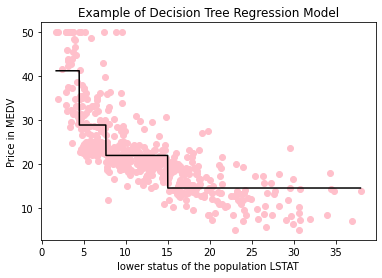

In [13]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'pink')
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Example of Decision Tree Regression Model')
plt.xlabel('lower status of the population LSTAT')
plt.ylabel('Price in MEDV')
plt.show()

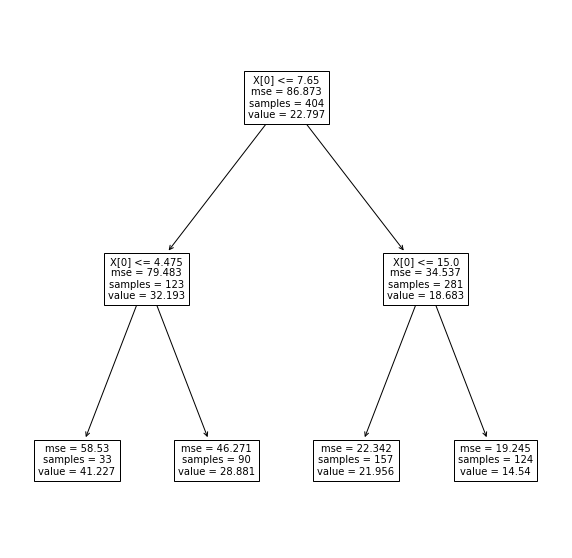

In [14]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(10, 10))

tree.plot_tree(regressor, fontsize=10)

plt.show()
